# PVE-analysis on research funding
*Collective Compass Project, DJA, July 2022*


---
## Loading the necessary Python modules.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
plt.rcParams.update({'font.size': 14}) # must set in top
plt.rcParams.update({'figure.figsize': (14, 4)}) # must set in top

In [2]:
df = pd.read_csv('../data/dat.csv')

---
## Correct the data where needed

In [3]:
df['institution'] = df['institution'].replace('Delft University of Technology', 'Technische Universiteit Delft')
df['institution'] = df['institution'].replace('Eindhoven University of Technology', 'Technische Universiteit Eindhoven')
df['institution'] = df['institution'].replace('Anders, niet in de lijst', 'Overig')

---
## Plot basic participation stats per stratification of choice

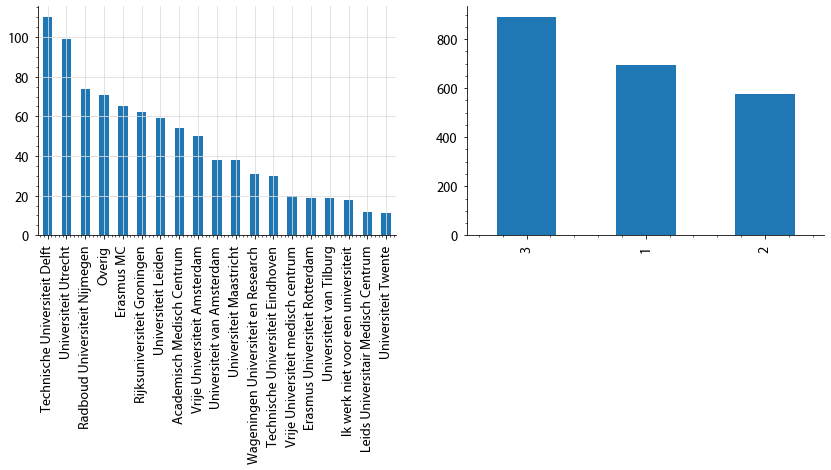

In [4]:
plt.figure()
plt.subplot(121)
df['institution'].value_counts().plot.bar()
plt.grid()
plt.subplot(122)
df['versie'].value_counts().plot.bar();

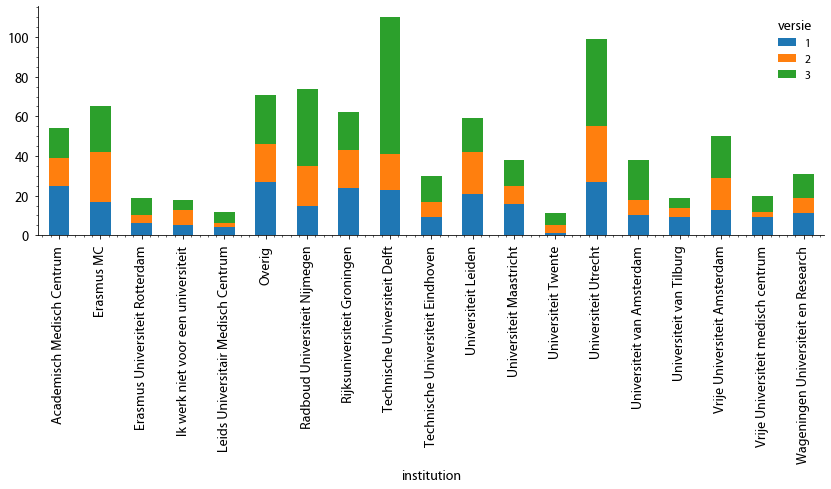

In [5]:
df_vals = df[['institution', 'versie']].value_counts()
df_vals.unstack('versie').plot.bar(stacked=True);

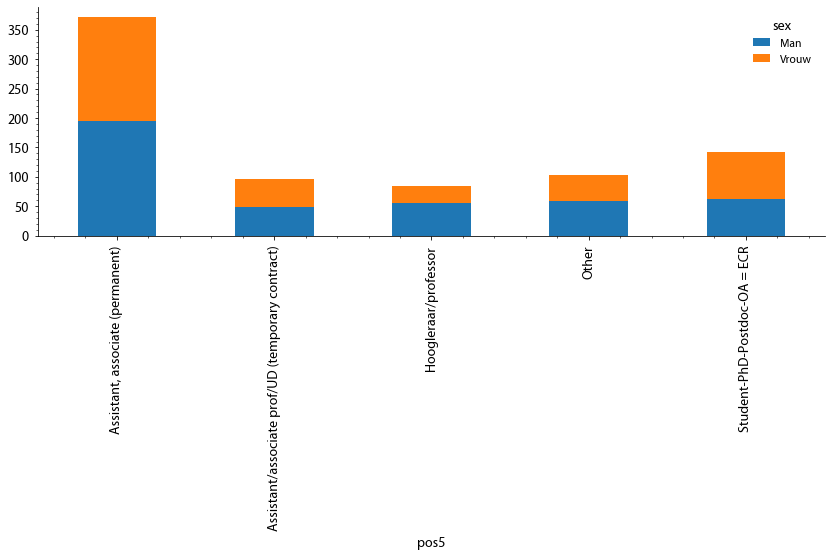

In [6]:
df_vals = df[['pos5', 'sex']].value_counts()
df_vals.unstack('sex').plot.bar(stacked=True);

---
## Postprocess the kt values to fraction of the total budget.

In [7]:
# Second, we multiply the kt values with the values above and normalize with the total
# to make each kt a fraction of the total money spend.
mask = df.columns.str.contains('funds_available|versie|ktversie|kt_slider*|kt_funds_*')
df_kt = df.iloc[:, mask].copy()
df_kt = df_kt.dropna()

for col in df_kt.iloc[:, df_kt.columns.str.contains('kt_slider*')]:
    funds_name = col.replace('slider', 'funds')
    df_kt.loc[:, col] *= (df_kt.loc[:, funds_name] / df_kt.loc[:, 'funds_available'])

In [8]:
# Create a table with the fraction spent per kt item per group.
kts = list( df_kt.iloc[:, df_kt.columns.str.contains('kt_slider*')] )
df_kt_per_version = df_kt.groupby('versie')[ kts ]
df_kt_per_version.mean()

,kt_slider_personal_senior,kt_slider_team,kt_slider_personal_ecr,kt_slider_thematic,kt_slider_thematic_co,kt_slider_small_first,kt_slider_small_second,kt_slider_award,kt_slider_first_ecr,kt_slider_rolling_ecr,kt_slider_rolling_senior
versie,,,,,,,,,,,
1,0.021351,0.023066,0.016912,0.018128,0.009331,0.023654,0.014146,0.002989,0.043685,0.099414,0.042268
2,0.022402,0.021485,0.021491,0.016228,0.008243,0.019174,0.014214,0.004305,0.062442,0.102782,0.038842
3,0.019554,0.021296,0.018647,0.020972,0.010279,0.022394,0.013390,0.003950,0.050770,0.105929,0.036656


In [9]:
# Print the fraction of the total money spent per experiment version.
df_kt_per_version.mean().sum(axis=1)

versie
1    0.314944
2    0.331609
3    0.323837
dtype: float64

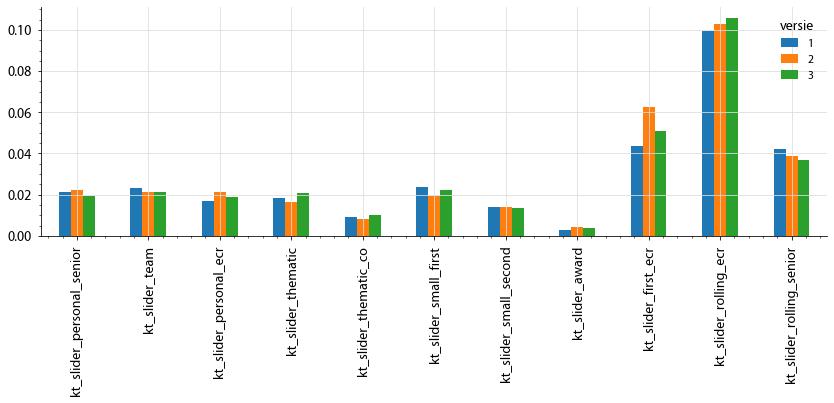

In [10]:
# Plot a histogram with a bar per version.
df_kt_per_version.mean().transpose().plot.bar()
plt.grid()

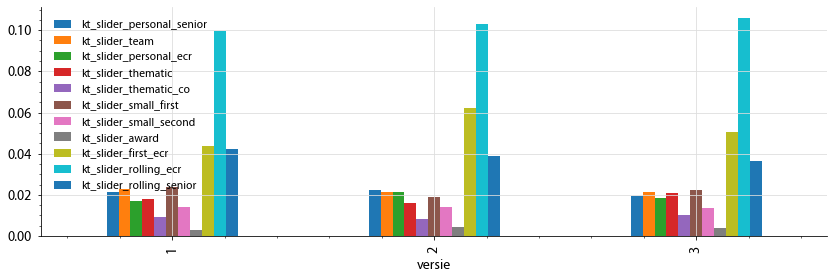

In [11]:
# Plot a histogram per version.
df_kt_per_version.mean().plot.bar()
plt.grid()